In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import time

In [67]:
import os 
import cv2 

In [69]:
path = r"D:\python\archive (7)\Training"

classes = {'notumor': 0, 'pituitary': 1}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [70]:
X = np.array(X)
Y = np.array(Y)

In [71]:
pd.Series(Y).value_counts()

0    1595
1    1457
Name: count, dtype: int64

In [72]:
X_updated = X.reshape(len(X), -1)
X.shape, X_updated.shape

((3052, 200, 200), (3052, 40000))

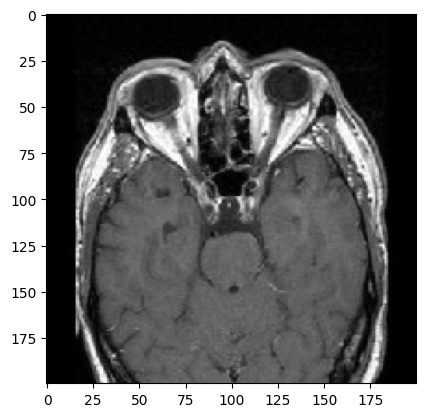

In [73]:
plt.imshow(X[0], cmap='gray')

In [74]:
# Reshape and Standardize 
X_updated = X.reshape(len(X), -1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_updated)

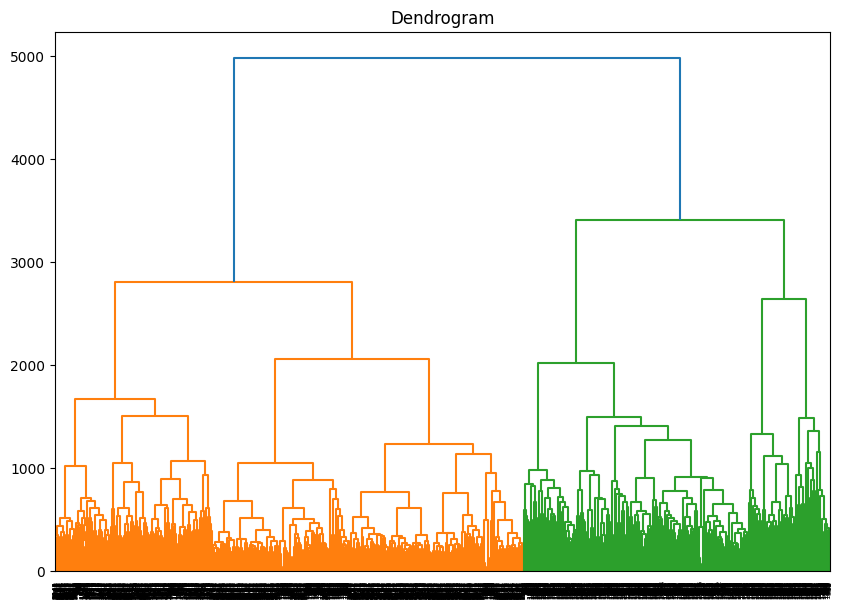

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Hierarchical Clustering
linked = linkage(X_standardized, method='ward')
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(linked)
plt.show()


In [76]:
# Fit Agglomerative Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)
hc_labels = hierarchical_clustering.fit_predict(X_standardized)


In [77]:
# K-Means Clustering
#Dimensionality Reduction(PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
start_time = time.time()
kmeans_labels = kmeans.fit_predict(X_standardized)
kmeans_time = time.time() - start_time


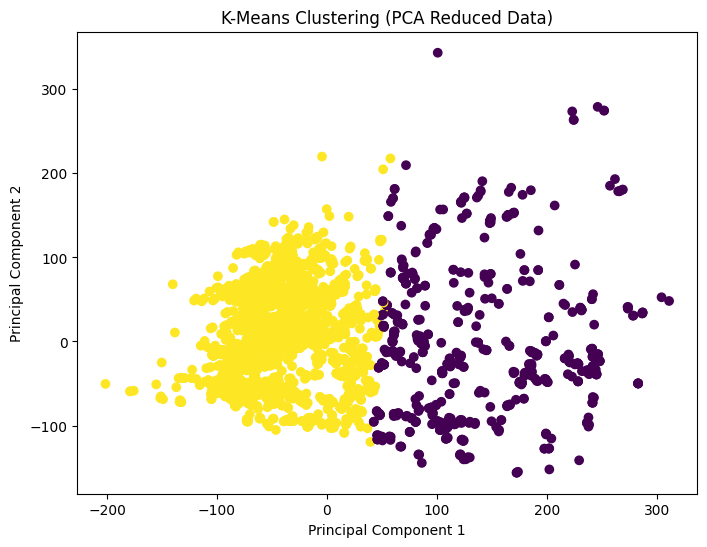

Agglomerative Clustering:
Silhouette Score: 0.135
Davies-Bouldin Index: 2.856

K-Means Clustering:
Silhouette Score: 0.252
Davies-Bouldin Index: 2.342
Execution Time: 2.820 seconds


In [78]:

# Silhouette Score
hc_silhouette = silhouette_score(X_standardized, hc_labels)
kmeans_silhouette = silhouette_score(X_standardized, kmeans_labels)

# Davies-Bouldin Index
db_hc = davies_bouldin_score(X_standardized, hc_labels)
db_kmeans = davies_bouldin_score(X_standardized, kmeans_labels)

# Visualize K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Agglomerative Clustering:")
print(f"Silhouette Score: {hc_silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_hc:.3f}")

print("\nK-Means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_kmeans:.3f}")
print(f"Execution Time: {kmeans_time:.3f} seconds")
